# Linear Regression from Scratch

In this notebook, I implement Linear Regression using pure NumPy to predict diabetes progression based on blood sugar level. The goal is to understand the mathematics behind Gradient Descent without relying on high-level frameworks for training.

### **Importing the necessary libraries:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

### **Importing the Dataset:**

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

## **Dataset description:**

In [3]:
print("Dataset Description:")
print(diabetes.DESCR)

print("\nFeature Names:")
print(diabetes.feature_names)

print("\nFirst 10 rows of data (features):")
print(diabetes.data[:10])

print("\nFirst 10 rows of target:")
print(diabetes.target[:10])

Dataset Description:
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 featu

### **Rolling the data:**

In [4]:
x_train = diabetes.data[:, 9]
y_train = diabetes.target[:]





### **Understanding the data:**

In [5]:
print(f"x Shape: {x_train.shape}, X Type:{type(x_train)})")
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")

x Shape: (442,), X Type:<class 'numpy.ndarray'>)
y Shape: (442,), y Type:<class 'numpy.ndarray'>)


### **Displaying the data in a graph:**

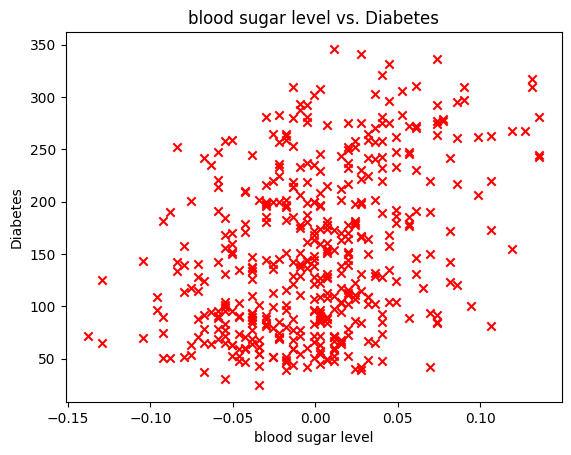

In [6]:
plt.scatter(x_train, y_train, marker='x', c='r')

plt.title("blood sugar level vs. Diabetes")

plt.ylabel('Diabetes')

plt.xlabel('blood sugar level')
plt.show()

### **Implementing the cost function:**

In [7]:
def compute_cost(x, y, w, b):

    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost


### **Gradient implementation:**


In [8]:
def compute_gradient(x,y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b

        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db


In [9]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):


    J_history = []
    p_history = []
    b = b_in
    w = w_in


    for i in range(num_iters):

        dj_dw, dj_db = gradient_function(x, y, w , b)


        b = b - alpha * dj_db
        w = w - alpha * dj_dw


        if i<100000:
            J_history.append(cost_function(x, y, w , b))
            p_history.append([w,b])


        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")


    return w, b, J_history, p_history

## **Processing the gradient:**

In [10]:

w_init = 1.255e+02
b_init = 1.52133e+02

iterations = 15000
tmp_alpha = 1.0e-1


w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

print(f"\n\n(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")


Iteration    0: Cost 2.81e+03  dj_dw: -1.117e+00, dj_db: -4.842e-04   w:  1.256e+02, b: 1.52133e+02
Iteration 1500: Cost 2.67e+03  dj_dw: -7.955e-01, dj_db: -9.735e-14   w:  2.677e+02, b: 1.52133e+02
Iteration 3000: Cost 2.60e+03  dj_dw: -5.666e-01, dj_db: -9.485e-14   w:  3.689e+02, b: 1.52133e+02
Iteration 4500: Cost 2.57e+03  dj_dw: -4.035e-01, dj_db: -9.613e-14   w:  4.409e+02, b: 1.52133e+02
Iteration 6000: Cost 2.55e+03  dj_dw: -2.874e-01, dj_db: -9.697e-14   w:  4.922e+02, b: 1.52133e+02
Iteration 7500: Cost 2.54e+03  dj_dw: -2.047e-01, dj_db: -9.536e-14   w:  5.288e+02, b: 1.52133e+02
Iteration 9000: Cost 2.54e+03  dj_dw: -1.458e-01, dj_db: -9.520e-14   w:  5.548e+02, b: 1.52133e+02
Iteration 10500: Cost 2.53e+03  dj_dw: -1.038e-01, dj_db: -9.359e-14   w:  5.733e+02, b: 1.52133e+02
Iteration 12000: Cost 2.53e+03  dj_dw: -7.393e-02, dj_db: -9.475e-14   w:  5.866e+02, b: 1.52133e+02
Iteration 13500: Cost 2.53e+03  dj_dw: -5.266e-02, dj_db: -9.330e-14   w:  5.960e+02, b: 1.52133e+

## **Showing the cost-to-iteration ratio:**

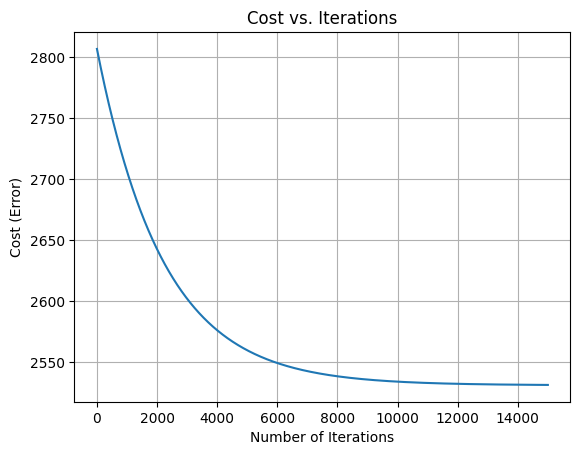

In [11]:

plt.plot(J_hist)


plt.title("Cost vs. Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost (Error)")
plt.grid(True)

plt.show()

## **Showing the Final Linear Regression:**

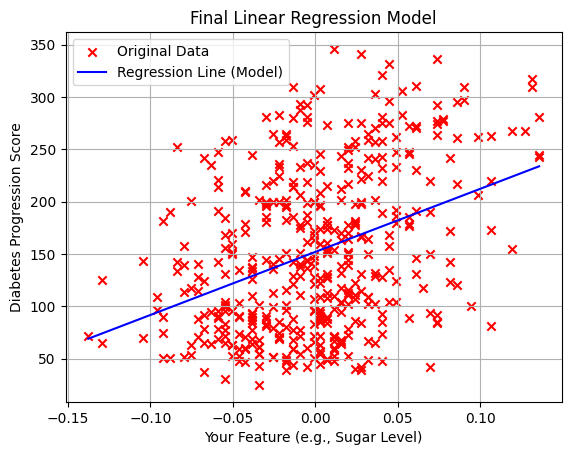

In [12]:
plt.scatter(x_train, y_train, marker='x', c='r', label='Original Data')

x_line = np.array([min(x_train), max(x_train)])
y_line = w_final * x_line + b_final

plt.plot(x_line, y_line, c='b', label='Regression Line (Model)')

plt.title("Final Linear Regression Model")
plt.xlabel("Your Feature (e.g., Sugar Level)")
plt.ylabel("Diabetes Progression Score")
plt.legend()
plt.grid(True)

plt.show()

## **Demonstrating the model's effectiveness:**

In [13]:
from sklearn.metrics import r2_score

y_predictions = w_final * x_train + b_final
r2 = r2_score(y_train, y_predictions)

print(f"Final Model Cost (MSE): {J_hist[-1]:.2f}")
print(f"Final Model Error (RMSE): {math.sqrt(J_hist[-1]):.2f} points")
print(f"Model R-squared (R²): {r2:.4f}")
# (The closer to 1.0, the better)

Final Model Cost (MSE): 2531.50
Final Model Error (RMSE): 50.31 points
Model R-squared (R²): 0.1462
